In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sb

In [2]:
raw_data = pd.read_csv("noshowappointments-kagglev2-may-2016 (1).csv")

In [3]:
raw_data.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


## In Order to find to explore this data, We want to find out:
### 1- Scholarship People vs their Ages
### 2- Spread of Diabetes in the patients
### 3- Stating ontingency table of Dataset Variables
### 4- Getting no. of Showed and not-showed between males and females
### 5- No. of people stated in dataset across neighbourhoods
### 6- no. of showed and not showed between females and males
### 7- Variance of numbers in Scheduled Days

# Data Cleaning
## Checking for null values in Data-frame

In [4]:
raw_data.isnull().values.any()

False

In [5]:
raw_data.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

# Getting Some Statistics[Standard Deviation, Mean Value, Min, Max, Interquartiles]

In [6]:
raw_data['Age'].describe()

count    110527.000000
mean         37.088874
std          23.110205
min          -1.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

In [7]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


# No. of Enrollments in Brasilian welfare

In [8]:
raw_data.Scholarship.value_counts()

0    99666
1    10861
Name: Scholarship, dtype: int64

In [9]:
def counting(dataframe, column):
    sb.countplot(x=column,data=dataframe)

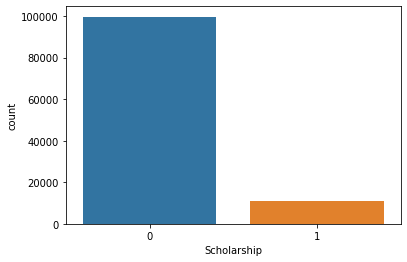

In [10]:
counting(raw_data, 'Scholarship')

# No. of people who showed-up is more than who doesn't

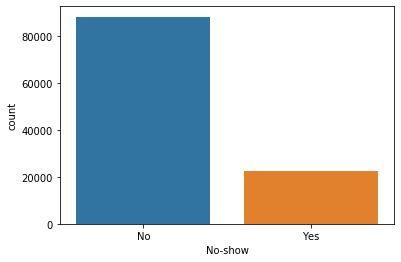

In [11]:
counting(raw_data, 'No-show')

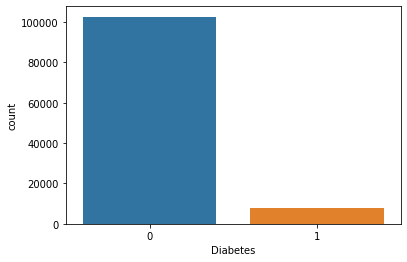

In [12]:
counting(raw_data, 'Diabetes')

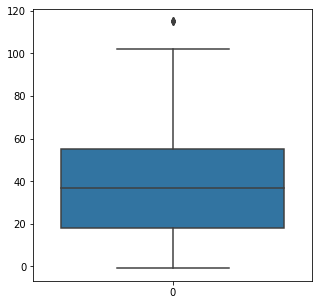

In [14]:
sb.boxplot(data=raw_data['Age'])
fig=plt.gcf()
fig.set_size_inches(5,5)

# Max., Min. Values of Dates in Appointment and Schedule

In [15]:
print(raw_data['AppointmentDay'].min())
print(raw_data['AppointmentDay'].max())

2016-04-29T00:00:00Z
2016-06-08T00:00:00Z


In [16]:
print(raw_data['ScheduledDay'].min())
print(raw_data['ScheduledDay'].max())

2015-11-10T07:13:56Z
2016-06-08T20:07:23Z


# Representation of Scholarship People and their Ages 

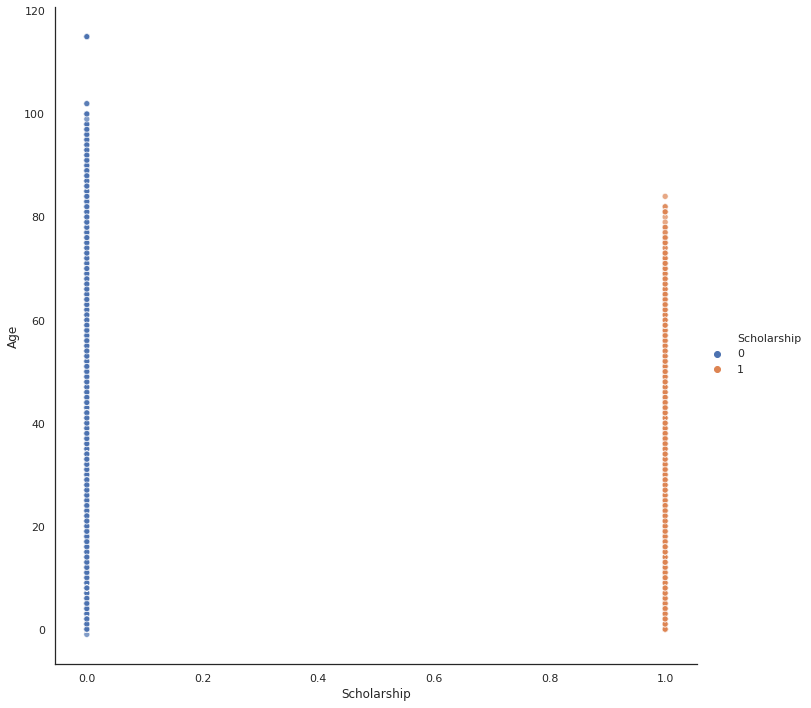

In [17]:
sb.set(style='white')
sb.relplot(x='Scholarship',y='Age',hue='Scholarship',alpha=0.7,height=10,data=raw_data)
plt.savefig('Scholarship People and their Ages.png')

# contingency table of Dataset Variables

In [18]:
raw_data.corr()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
PatientId,1.000000,0.004039,-0.004139,-0.002880,-0.006441,0.001605,0.011011,-0.007916,-0.009749
AppointmentID,0.004039,1.000000,-0.019126,0.022615,0.012752,0.022628,0.032944,0.014106,-0.256618
Age,-0.004139,-0.019126,1.000000,-0.092457,0.504586,0.292391,0.095811,0.078033,0.012643
Scholarship,-0.002880,0.022615,-0.092457,1.000000,-0.019729,-0.024894,0.035022,-0.008586,0.001194
Hipertension,-0.006441,0.012752,0.504586,-0.019729,1.000000,0.433086,0.087971,0.080083,-0.006267
Diabetes,0.001605,0.022628,0.292391,-0.024894,0.433086,1.000000,0.018474,0.057530,-0.014550
Alcoholism,0.011011,0.032944,0.095811,0.035022,0.087971,0.018474,1.000000,0.004648,-0.026147
Handcap,-0.007916,0.014106,0.078033,-0.008586,0.080083,0.057530,0.004648,1.000000,-0.024161
SMS_received,-0.009749,-0.256618,0.012643,0.001194,-0.006267,-0.014550,-0.026147,-0.024161,1.000000


# Heat-Map of contingency table of Dataset Variables

## The Heat Map showed that there is relation between diabetes and hypertension  & strong relation between hypertension and age 

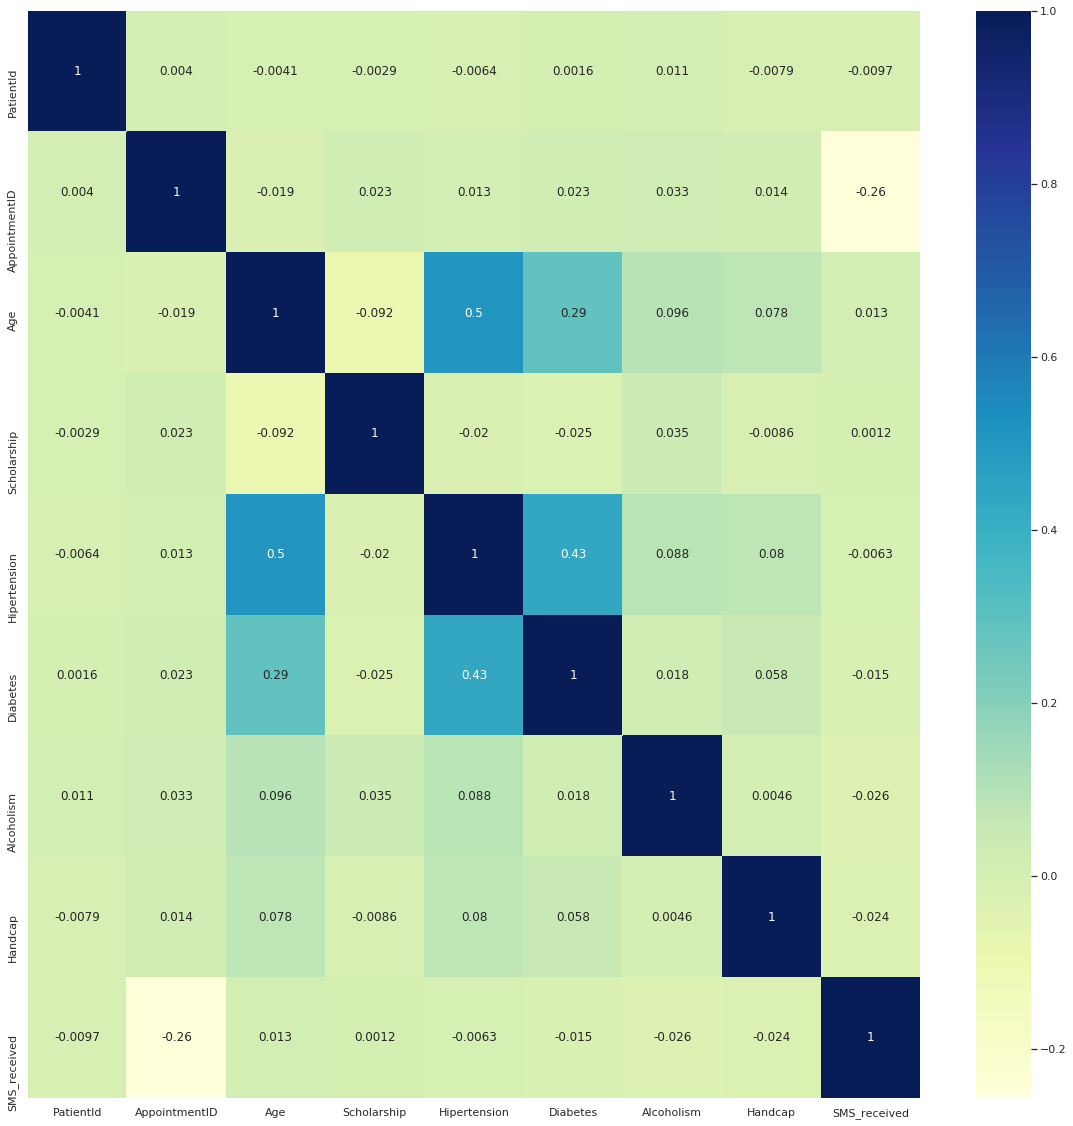

In [19]:
#heatmap for all the required features for correlation
raw_data_hm=raw_data[['SMS_received', 'Handcap', 'Alcoholism', 'Diabetes',
    'Hipertension', 'Scholarship']]
fig, ax = plt.subplots(figsize=(20,20))
sb.heatmap(raw_data.corr(),cmap = 'YlGnBu',annot=True,ax=ax)
plt.savefig('Heat-Map of contingency table of Dataset Variables.png')

# Creating Dataframes of AppointmentDay and ScheduledDay

In [20]:
raw_data_AppointmentDay = raw_data.AppointmentDay.apply(np.datetime64)
raw_data_ScheduledDay   = raw_data.ScheduledDay.apply(np.datetime64)

In [21]:
raw_data_AppointmentDay

0        2016-04-29
1        2016-04-29
2        2016-04-29
3        2016-04-29
4        2016-04-29
            ...    
110522   2016-06-07
110523   2016-06-07
110524   2016-06-07
110525   2016-06-07
110526   2016-06-07
Name: AppointmentDay, Length: 110527, dtype: datetime64[ns]

In [22]:
raw_data_ScheduledDay

0        2016-04-29 18:38:08
1        2016-04-29 16:08:27
2        2016-04-29 16:19:04
3        2016-04-29 17:29:31
4        2016-04-29 16:07:23
                 ...        
110522   2016-05-03 09:15:35
110523   2016-05-03 07:27:33
110524   2016-04-27 16:03:52
110525   2016-04-27 15:09:23
110526   2016-04-27 13:30:56
Name: ScheduledDay, Length: 110527, dtype: datetime64[ns]

# Getting no. of Showed and not-showed males and females

In [23]:
Not_Showed = []
Showed = []
gender_not = []
gender_yes = []
for c,i in enumerate(raw_data['No-show']):
    if i == 'Yes':        
        Not_Showed.append(i)
        gender_not.append(raw_data['Gender'][c])
    else:
        Showed.append(i)
        gender_yes.append(raw_data['Gender'][c])

In [24]:
print(len(Not_Showed), len(gender_not))
print(len(Showed), len(gender_yes))

22319 22319
88208 88208


In [25]:
Not_Showed_df = pd.DataFrame({'Not_Showed':Not_Showed, 'Gender':gender_not})
Showed_df = pd.DataFrame({'Showed':Showed, 'Gender':gender_yes})

## Showed Data-frame

In [26]:
Showed_df

,Showed,Gender
0,No,F
1,No,M
2,No,F
3,No,F
4,No,F
...,...,...
88203,No,F
88204,No,F
88205,No,F
88206,No,F


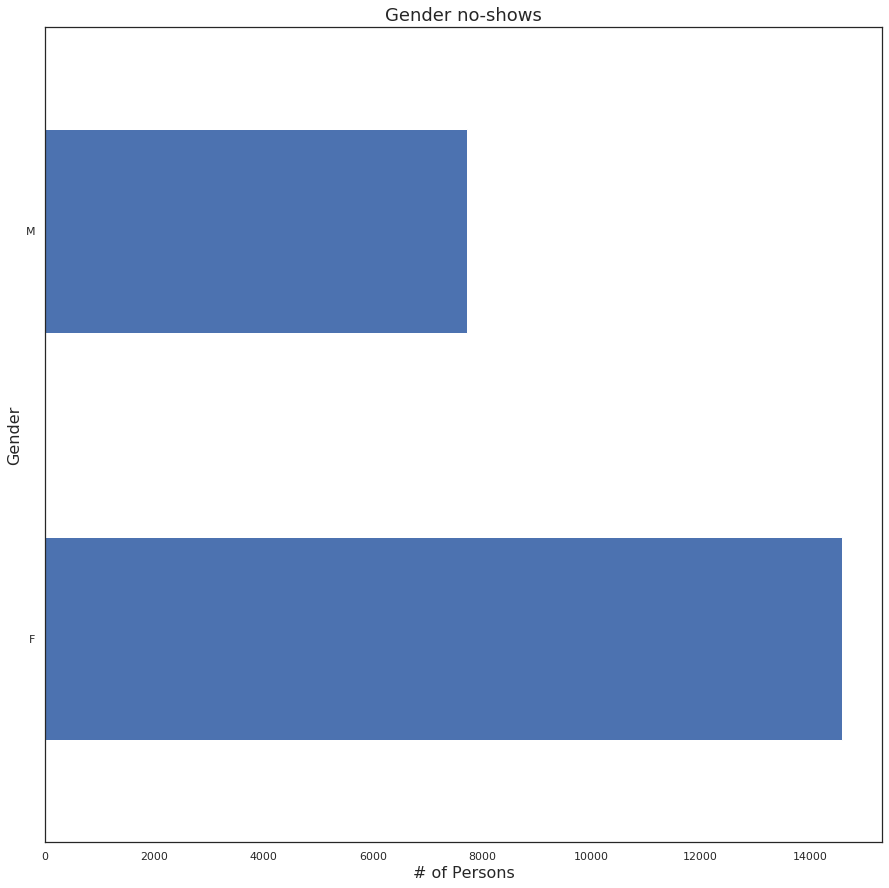

In [27]:
ax = Not_Showed_df.Gender.value_counts().plot(kind='barh',figsize=(15,15))
ax.set_ylabel('Gender',fontsize=16)
ax.set_xlabel('# of Persons', fontsize=16)
ax.set_title('Gender no-shows',fontsize=18)
plt.savefig('Gender no-shows.png')

In [28]:
Showed_df.Gender.value_counts()

F    57246
M    30962
Name: Gender, dtype: int64

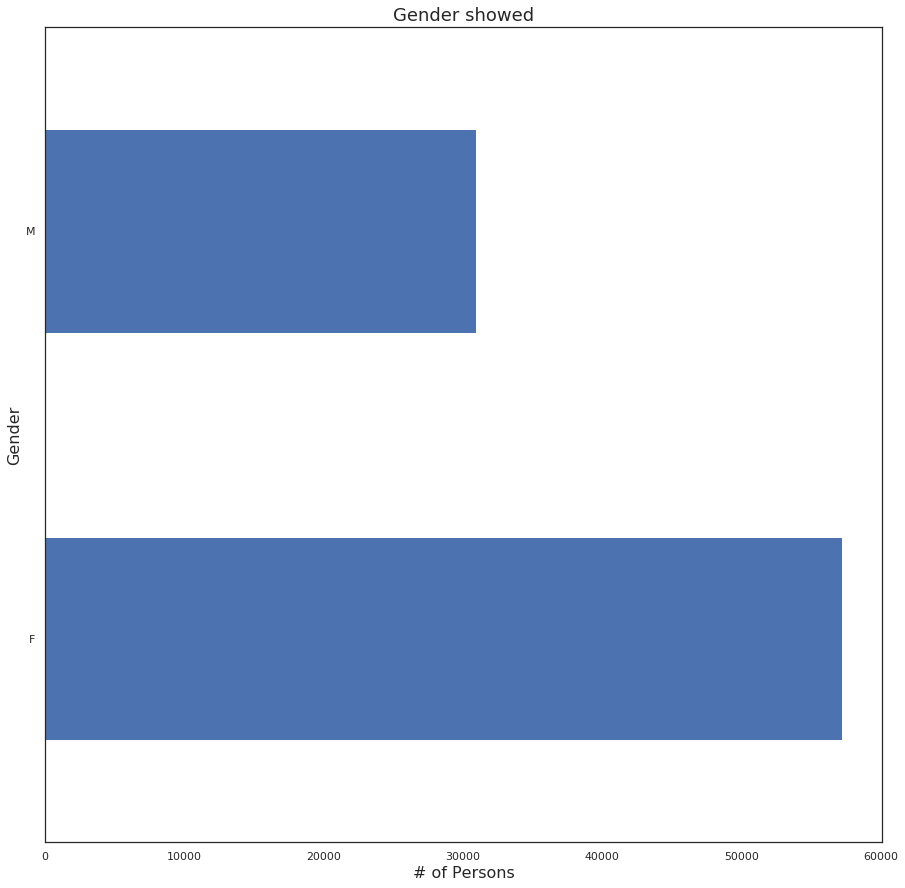

In [29]:
ax = Showed_df.Gender.value_counts().plot(kind='barh',figsize=(15,15))
ax.set_ylabel('Gender',fontsize=16)
ax.set_xlabel('# of Persons', fontsize=16)
ax.set_title('Gender showed',fontsize=18)
plt.savefig('Gender showed.png')

# It's found that no. of showed and not showed females is more than males

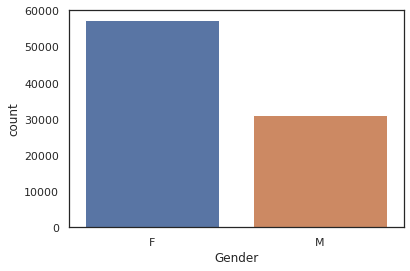

In [30]:
counting(Showed_df, 'Gender')

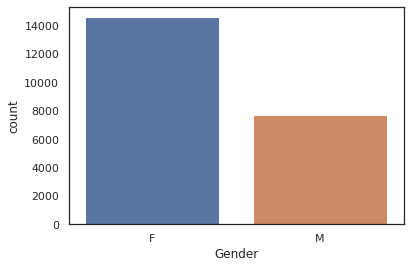

In [32]:

counting(Not_Showed_df, 'Gender')

# Variance of numbers in Appointment across Days

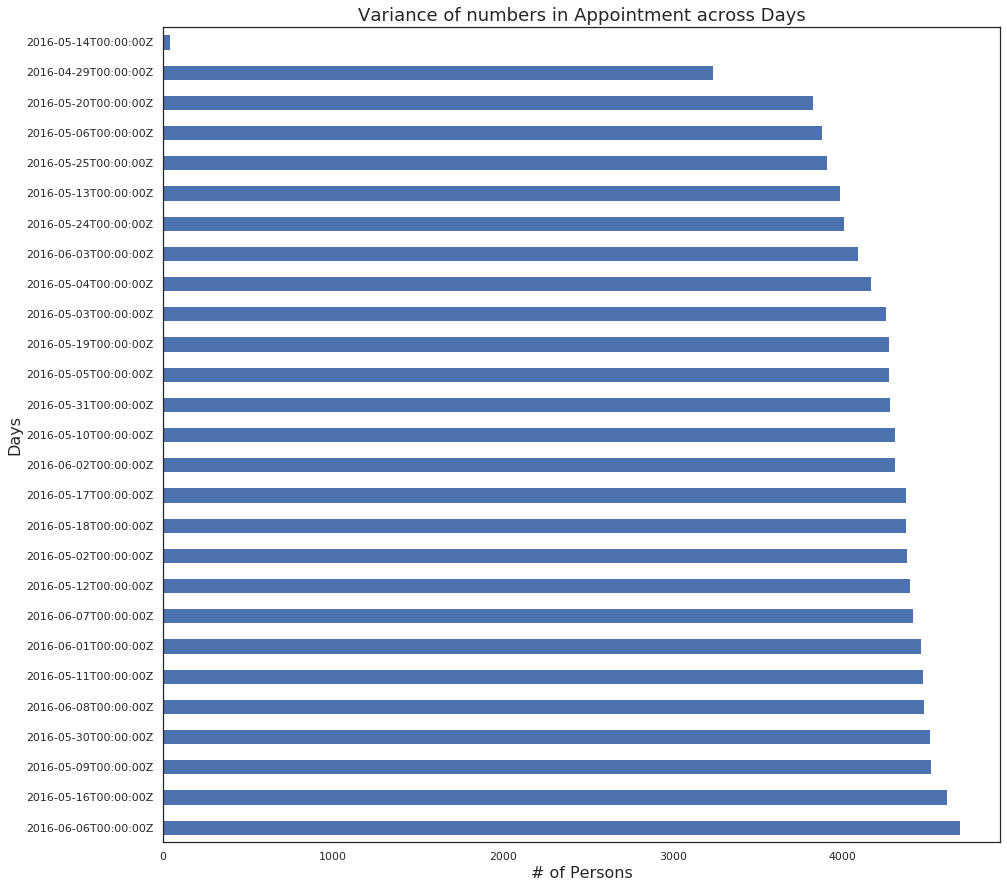

In [33]:
ax = raw_data.AppointmentDay.value_counts().plot(kind='barh',figsize=(15,15))
ax.set_ylabel('Days',fontsize=16)
ax.set_xlabel('# of Persons', fontsize=16)
ax.set_title('Variance of numbers in Appointment across Days',fontsize=18)
plt.savefig('Variance of numbers in Appointment across Days.png')

In [34]:
raw_data.Neighbourhood.value_counts()

JARDIM CAMBURI                 7717
MARIA ORTIZ                    5805
RESISTÊNCIA                    4431
JARDIM DA PENHA                3877
ITARARÉ                        3514
                               ... 
ILHA DO BOI                      35
ILHA DO FRADE                    10
AEROPORTO                         8
ILHAS OCEÂNICAS DE TRINDADE       2
PARQUE INDUSTRIAL                 1
Name: Neighbourhood, Length: 81, dtype: int64

# Variance of numbers in Scheduled Days

In [35]:
from datetime import datetime

date_list = []
for i in raw_data['ScheduledDay']:
    dt_ScheduledDay = datetime.strptime(str(i), "%Y-%m-%dT%H:%M:%SZ")
    day = dt_ScheduledDay.day
    month = dt_ScheduledDay.month
    date_list.append(str(str(month)+str("/")+str(day)))

In [36]:
Scheduled = pd.DataFrame(
    {'Date': date_list})

In [37]:
Scheduled

,Date
0,4/29
1,4/29
2,4/29
3,4/29
4,4/29
...,...
110522,5/3
110523,5/3
110524,4/27
110525,4/27


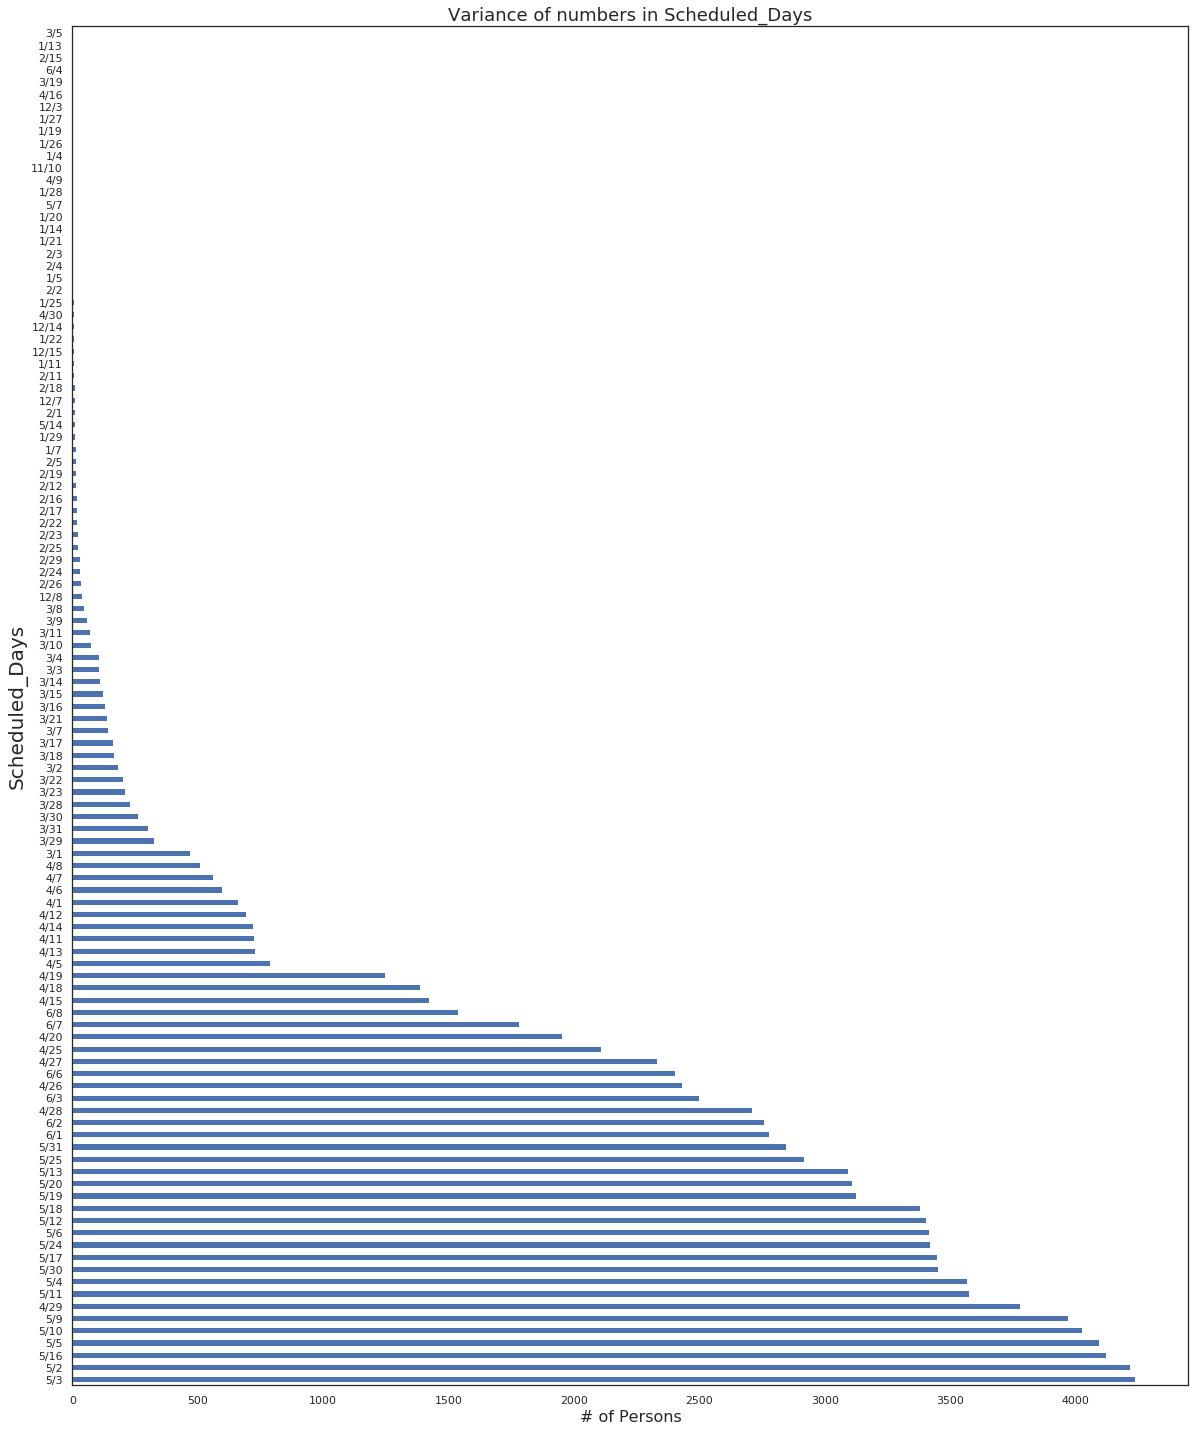

In [38]:
ax2 = Scheduled.Date.value_counts().plot(kind='barh',figsize=(20,25))
ax2.set_ylabel('Scheduled_Days',fontsize=20)
ax2.set_xlabel('# of Persons', fontsize=16)
ax2.set_title('Variance of numbers in Scheduled_Days',fontsize=18)
plt.savefig('Variance of numbers in Scheduled_Days.png')

# No. of people stated in dataset in neighbourhoods

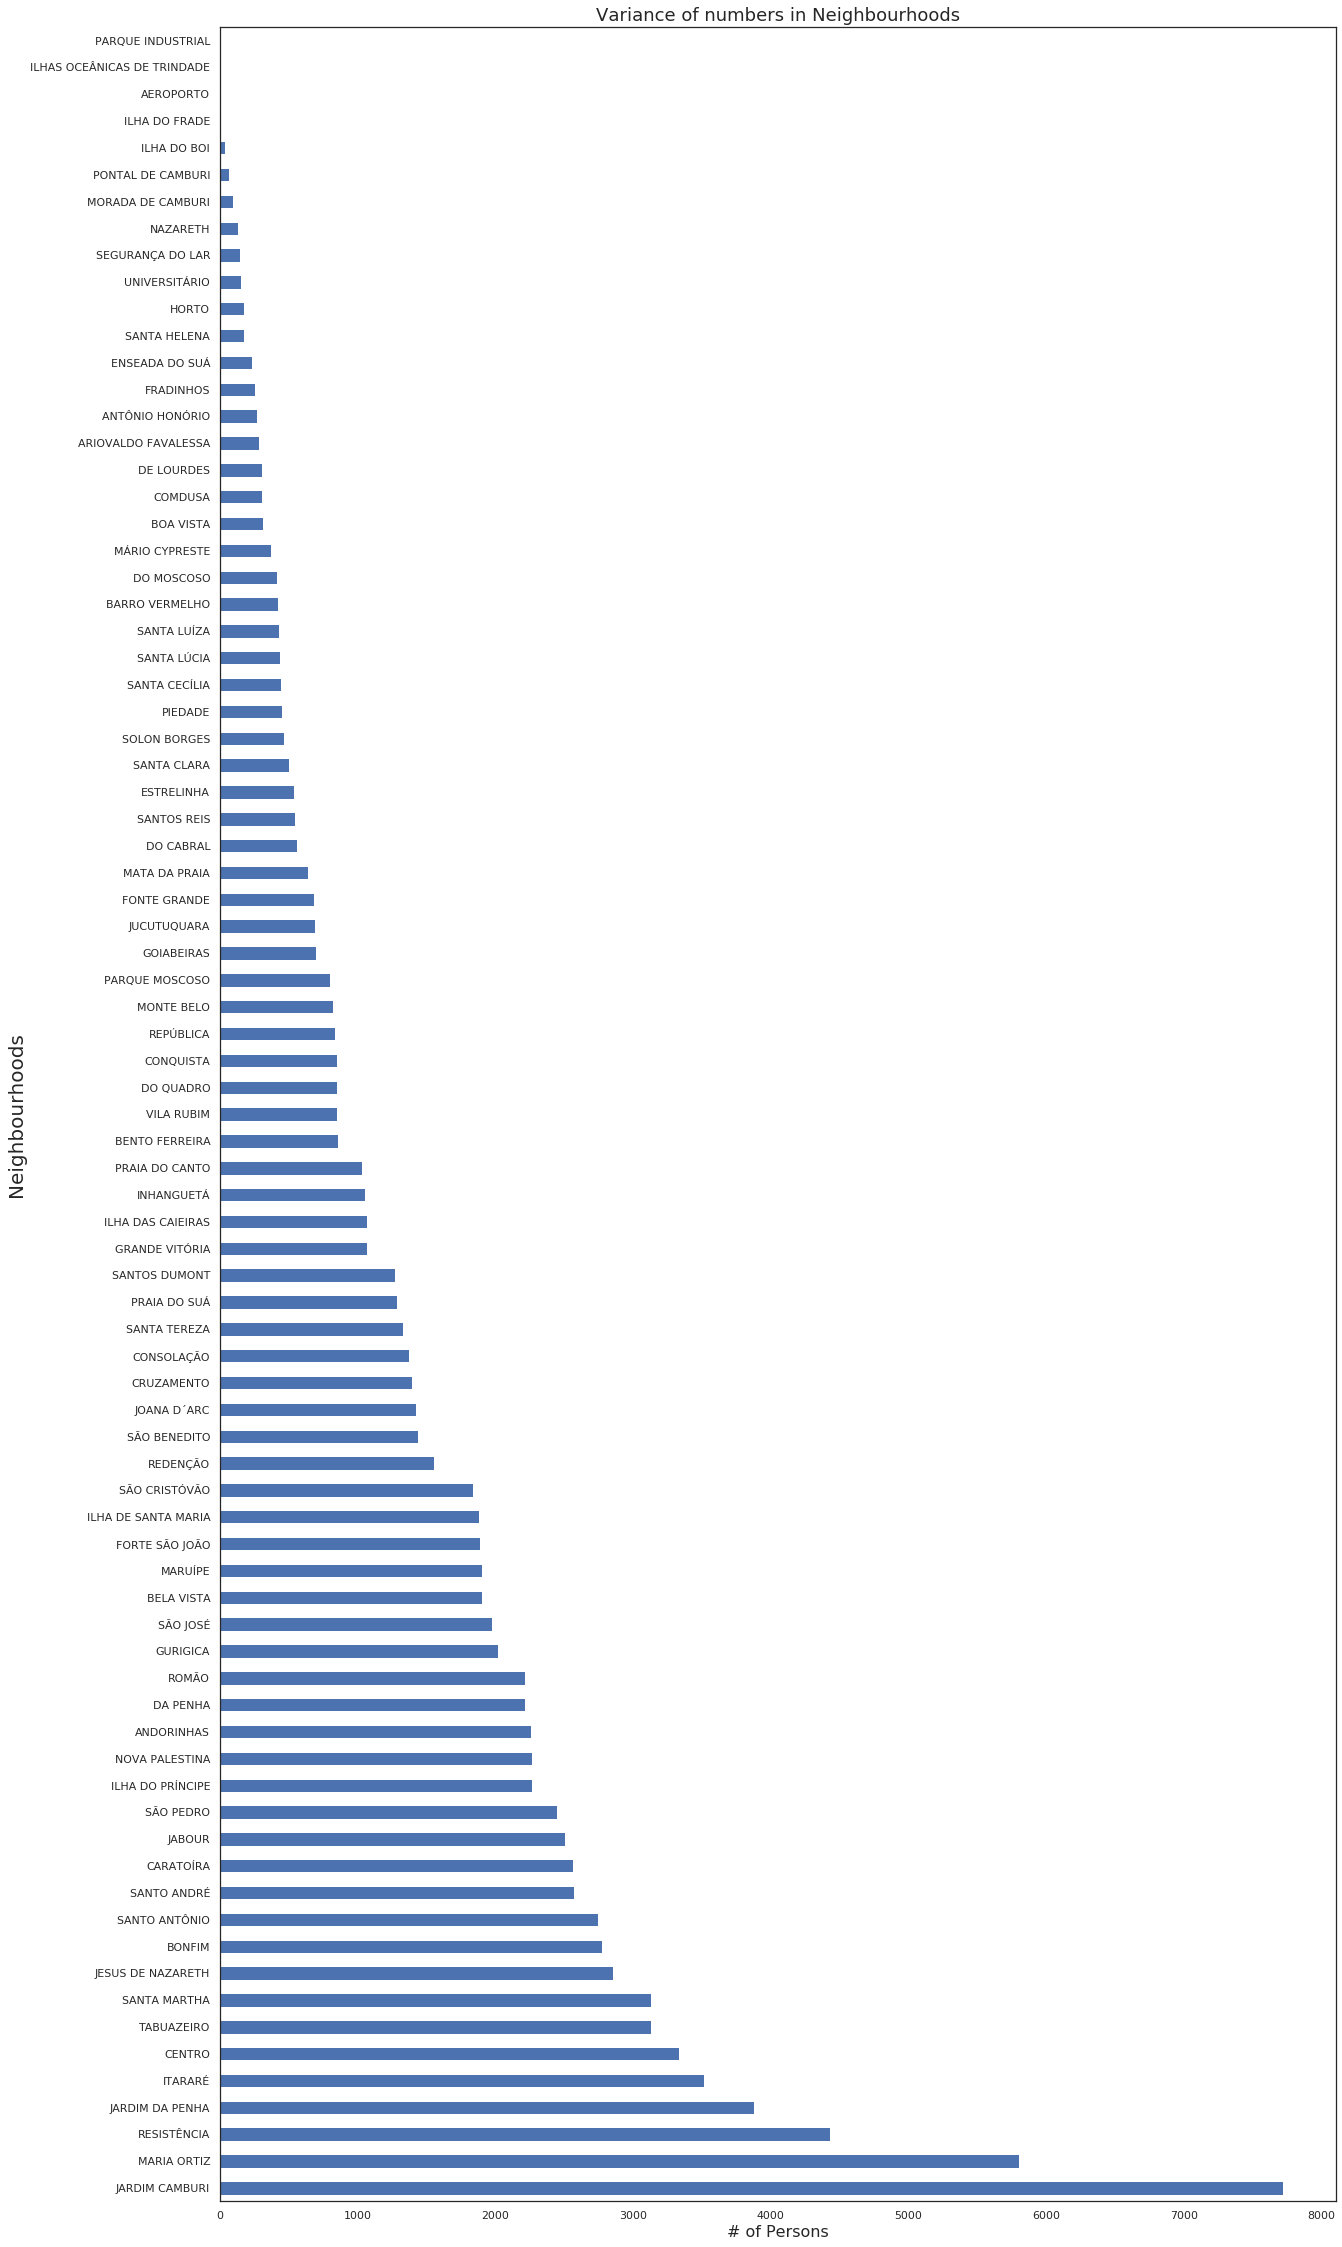

In [39]:
ax = raw_data.Neighbourhood.value_counts().plot(kind='barh',figsize=(20,40))
ax.set_ylabel('Neighbourhoods',fontsize=20)
ax.set_xlabel('# of Persons', fontsize=16)
ax.set_title('Variance of numbers in Neighbourhoods',fontsize=18)
plt.savefig('Variance of numbers in Neighbourhoods.png')

# Conclusions

## what we found out is :
### 1- That there is nearly equality in the high and low ages and both can be having a scholarship or not and there is no specific relation with age
### 2- No. of people who showed-up is more than who doesn't
### 3- The Heat Map showed that there is relation between diabetes and hypertension  & strong relation between hypertension and age 
### 4-  It's found that no. of showed and not showed females is more than males

## Limitations

### There is a problem in the dataset id we want to get more specific insights about the health state of the people in the dataset which is to collect this data after all of them are showed to the doctor to get the realtime state of them there are very possible of most them may have diabetes now, start drinking alcohols or having hypertension